<h2>Neural Network from scratch in Python</h2>
<h3>Make your own machine learning library</h3>
<p>MNIST FC --- version: notebook + lib</p>
<p>
Este notebook foi preparado para fazer a correção do trabalho 2 do cursos INF1310/INF2064 de 2021.2 da PUC-Rio.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import sklearn.metrics as mt
import time 

<h2>Importa a rede implementada por cada alun@ </h2>
<p>
Cada alun@ deve desenvolver uma biblioteca que implemnta um rede MultiLayerPerceptron num arquivo 
Pyhton chamado "MLPSeuNome.py"  
que tenha a API que atenda este notebook.</br>
</p>

In [2]:
from MLP_DavidJentjens import *
autor = "David Maisonnette Jentjens"

<h2>Carrega MNIST da rede</h2>

In [3]:
#MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


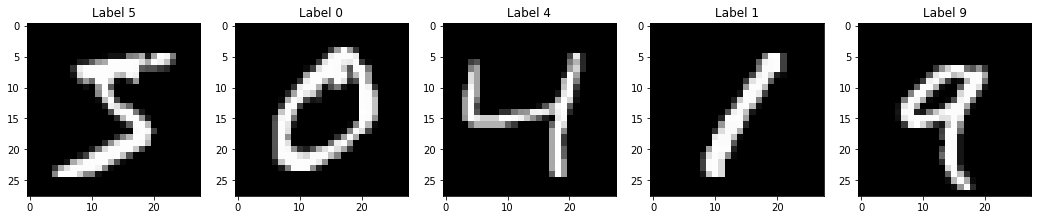

In [4]:
fig, ax = plt.subplots(1,5, figsize=(18, 8))
for i in range(5):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title('Label ' + str(y_train[i]))
plt.show()

In [5]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0],28*28)
x_train = x_train.astype('float32')
x_train /= 255
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

#y_train = np_utils.to_categorical(y_train)

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0],28*28)
x_test = x_test.astype('float32')
x_test /= 255
#y_test = np_utils.to_categorical(y_test)

print(x_train.shape)

(60000, 784)


In [6]:
# Compute the "on hot representation" of a lable 
def one_hot(vet):
    n = vet.shape[0]
    mat = np.zeros(shape=(n,10),dtype=np.int32)
    for i in range(n):
        j = vet[i]
        mat[i,j]=1
    return mat

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)

print(y_train[0],y_train_one_hot[0])
print(y_test[0],y_test_one_hot[0])

print(y_train.shape,y_train_one_hot.shape)

5 [0 0 0 0 0 1 0 0 0 0]
7 [0 0 0 0 0 0 0 1 0 0]
(60000,) (60000, 10)


<h2>Verifica o balanceamento das amostras</h2>

In [7]:
#Count occurrences of each class in each set
values, counts_train = np.unique(y_train, return_counts=True)
values, counts_test = np.unique(y_test, return_counts=True)
print(f'Valores Y: {values}')
print(f'Histograma treinamento: {counts_train}')
print(f'Histograma test: {counts_test}')
print(f'Totais: treinamento={np.sum(counts_train)}, test={np.sum(counts_test)}')

Valores Y: [0 1 2 3 4 5 6 7 8 9]
Histograma treinamento: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Histograma test: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
Totais: treinamento=60000, test=10000


<h2>Definição da rede</h2>

In [8]:
x_train = x_train.reshape(60000, 1, 784)

In [9]:
# Network
net = Network()
net.layer(FCLayer(28*28, 100))                # input_shape=(1, 28*28)    ;   output_shape=(1, 200)
net.layer(ActLayer(sigmoid, sigmoid_prime))
net.layer(FCLayer(100, 50))                   # input_shape=(1, 200)      ;   output_shape=(1, 100)
net.layer(ActLayer(sigmoid, sigmoid_prime))
net.layer(FCLayer(50, 10))                    # input_shape=(1, 50)      ;   output_shape=(1, 10)
net.layer(ActLayer(sigmoid, sigmoid_prime))
net.use(mse, mse_prime)

<h2>Treinamento</h2>

In [10]:
mini_batch = 1000

batches = [x_train[i * mini_batch:(i + 1) * mini_batch] for i in range((len(x_train) + mini_batch - 1) // mini_batch )];
print()
print([len(batch) for batch in batches])


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [11]:
from MLP_DavidJentjens import *

np.random.seed(13)  # garante que todas as inicializações são iguais
start = time.perf_counter()

err_train=net.fit(x_train, y_train_one_hot, epochs=20, mini_batch=1000, learning_rate=0.1)

stop=time.perf_counter()
time_train = stop-start
print(f'tempo de treinamento = {time_train:.2f} s')

(60000, 1, 784)
(60, 1000, 1, 784)
(1000, 1, 784)


ValueError: operands could not be broadcast together with shapes (50,10) (1,500000) (50,10) 

In [ ]:
x = np.arange(0,len(err_train),1)
plt.figure(figsize=(8,5))
plt.plot(x,err_train)
plt.ylabel('erro')
plt.xlabel('epocas')
plt.show()

<h2>Teste</h2>

In [ ]:
start=time.perf_counter()
y_pred_one_hot = net.predict(x_test)
y_pred = np.argmax(y_pred_one_hot, axis=-1)
print(y_pred_one_hot.shape, y_pred.shape)
stop=time.perf_counter()
time_pred = stop-start
print(f'tempo de predicao = {time_pred:.3f} s')

In [ ]:
def plot_confusion_matrix(title,cm,class_names,size):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(size,size))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
   
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    #cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = 0.7*cm.max()
    
    #for i, j in itt.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if cm[i, j] > threshold else "black"
            plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [ ]:
# Calculate the confusion matrix using sklearn.metrics
CM = mt.confusion_matrix(y_test, y_pred)
fig=plot_confusion_matrix("Matriz de Confusao", CM, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 6)

<h2>Medidas de erro</h2>

In [ ]:
num = den = 0
for i in range(10):
    for j in range(10):
        if i==j:
            num+=CM[i,j]
        den+=CM[i,j]
acuracia = 100*num/den
print(f'Acuracia={acuracia:.0f}%')

<h2>Salva os resultados</h2>

In [ ]:
fp = open("t2.csv","a")
fp.write(f'{autor};{time_train};{time_pred};{acuracia}\n')
fp.close()